<a href="https://colab.research.google.com/github/YishaZukhrufin/PCVK/blob/main/3A_30_Yisha_Zukhrufin_A_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA   : YISHA ZUKHRUFIN A**

**KELAS  : TI-3A**

**NO.ABS : 30**

**NIM    : 2141720013**



1.  import folder yang ada di Drive Anda

In [1]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)
Star

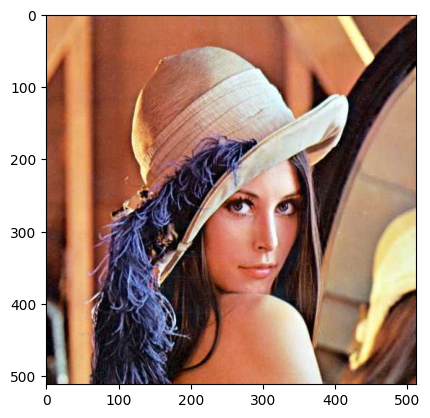

In [16]:
img_1 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpeg')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [17]:
height, width, depth = np.shape(img_1)
names = np.arange(256) # membuat array 0-256 secara berturut

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]]+=1
    green[img_1[y][x][1]]+=1
    red[img_1[y][x][2]]+=1

<BarContainer object of 256 artists>

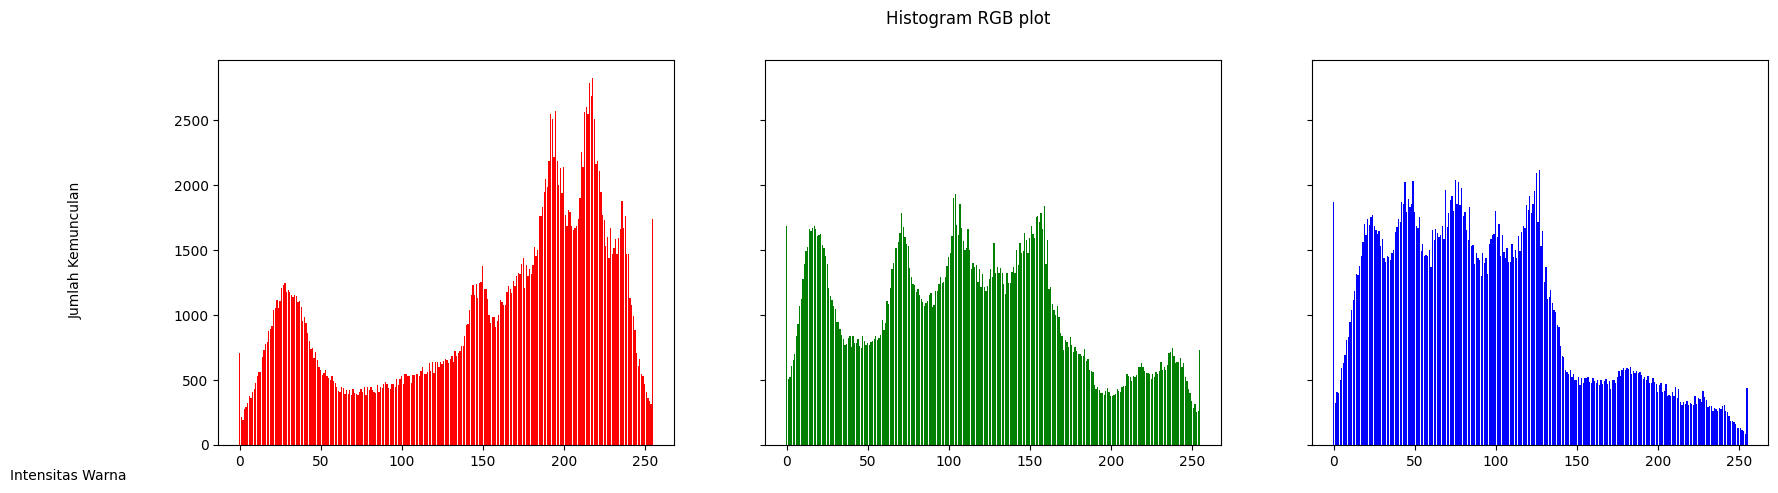

In [18]:
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.05, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

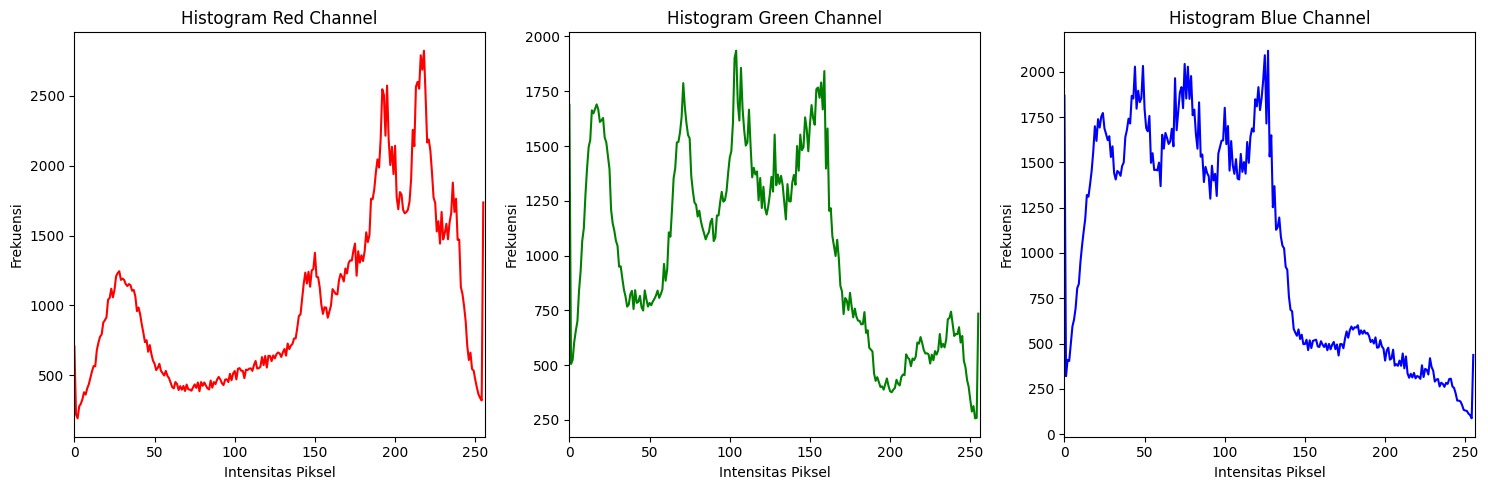

In [23]:

# Hitung histogram untuk masing-masing saluran warna
hist_red, bins_red = np.histogram(red_channel.ravel(), bins=256, range=[0, 256])
hist_green, bins_green = np.histogram(green_channel.ravel(), bins=256, range=[0, 256])
hist_blue, bins_blue = np.histogram(blue_channel.ravel(), bins=256, range=[0, 256])

# Tampilkan histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Histogram Red Channel')
plt.plot(hist_red, color='red')
plt.xlim([0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.title('Histogram Green Channel')
plt.plot(hist_green, color='green')
plt.xlim([0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.title('Histogram Blue Channel')
plt.plot(hist_blue, color='blue')
plt.xlim([0, 256])
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()



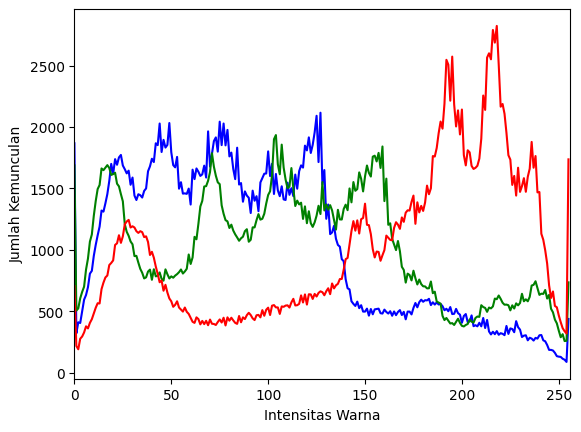

In [24]:
# Menentukan daftar warna dan ID saluran (channel) (0 = biru, 1 = hijau, 2 = merah)
colors = ("b", "g", "r")
channel_ids = (0, 1, 2)

# Membatasi sumbu x plot ke rentang 0 hingga 255
plt.xlim([0, 256])

# Loop melalui saluran (channel) warna (biru, hijau, merah)
for channel_id, c in zip(channel_ids, colors):
    # Menghitung histogram untuk saluran warna tertentu
    histogram, bin_edges = np.histogram(
        img_1[:, :, channel_id], bins=256, range=(0, 256)
    )

    # Plot histogram menggunakan warna yang sesuai
    plt.plot(bin_edges[0:-1], histogram, color=c)

# Menambahkan label sumbu x dan y ke plot
plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

# Menampilkan plot histogram
plt.show()

Apakah output muncul sama?

jawab:

ya, muncul output yang sama

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


In [33]:
# Membaca gambar 'lena_lc.jpg' dari Google Drive
img1 = cv.imread('/content/drive/MyDrive/PCVK/artispcvk.jpeg')

# Fungsi untuk menghitung histogram gambar
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

# Menghitung histogram gambar asli
histo_asli = histog(img1)

# Mengonversi gambar menjadi array Numpy
img_array = np.asarray(img1)


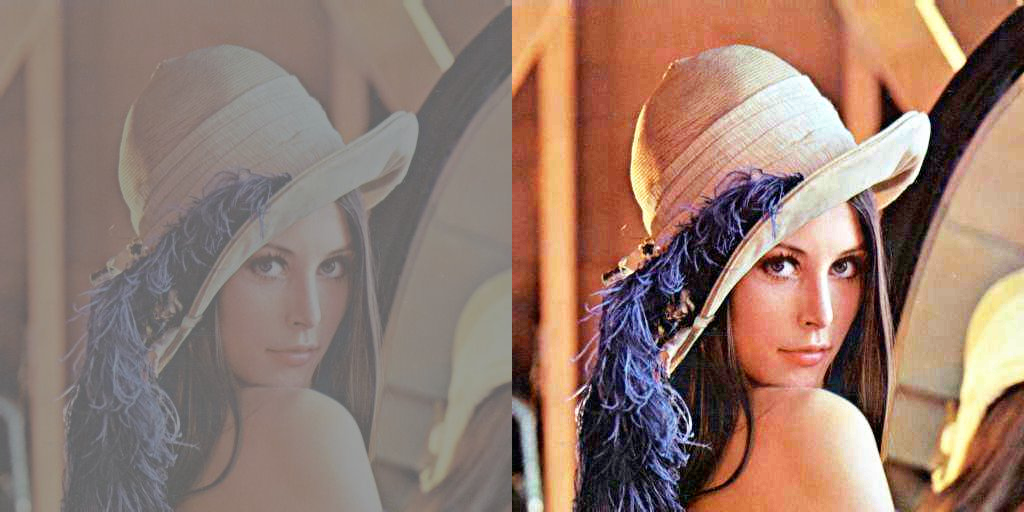

In [34]:
# Langkah 1: Histogram kumulatif yang dinormalisasi
# Meratakan array gambar dan menghitung histogram dengan pembagian bin
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Histogram kumulatif yang dinormalisasi
chistogram_array = np.cumsum(histogram_array)

# Langkah 2: Tabel pencarian pemetaan piksel
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Langkah 3: Transformasi
# Meratakan array gambar menjadi daftar
img_list = list(img_array.flatten())

# Mengubah nilai piksel sesuai dengan pemetaan
eq_img_list = [transform_map[p] for p in img_list]

# Mengembalikan bentuk asli dan menulis kembali ke img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

# Menghitung histogram gambar hasil ekualisasi
equal_histo = histog(img2)

# Menggabungkan gambar asli dan gambar hasil ekualisasi
final_frame = cv.hconcat((img1, img2))

# Menampilkan gambar
cv2_imshow(final_frame)

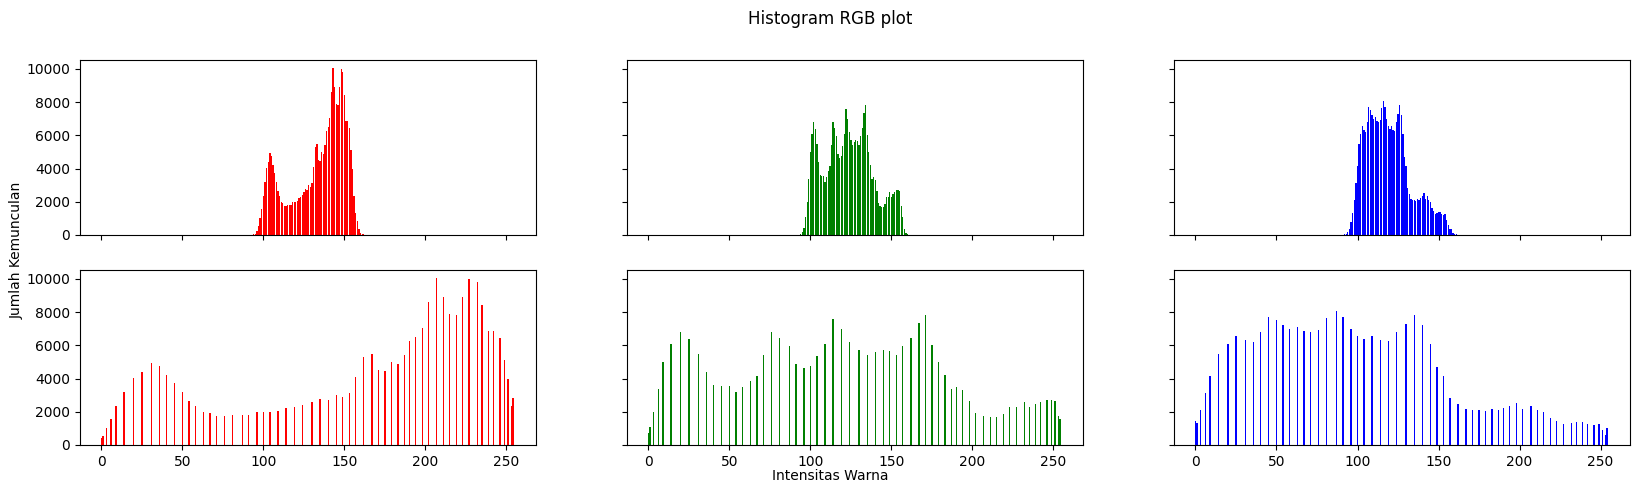

In [35]:
# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Memeriksa apakah gambar adalah gambar grayscale
isgrayimg = np.array_equal(histo_asli[0], histo_asli[1]) and np.array_equal(histo_asli[1], histo_asli[2])

# Menampilkan plot histogram sesuai dengan jenis gambar (grayscale atau warna)
if not isgrayimg:
    # Gambar berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    # Gambar grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')  # Mengganti judul grafik
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')  # Menggunakan histo_asli[0] untuk gambar grayscale asli
    axs[1].bar(names, equal_histo[0], color='gray')  # Menggunakan equal_hist

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

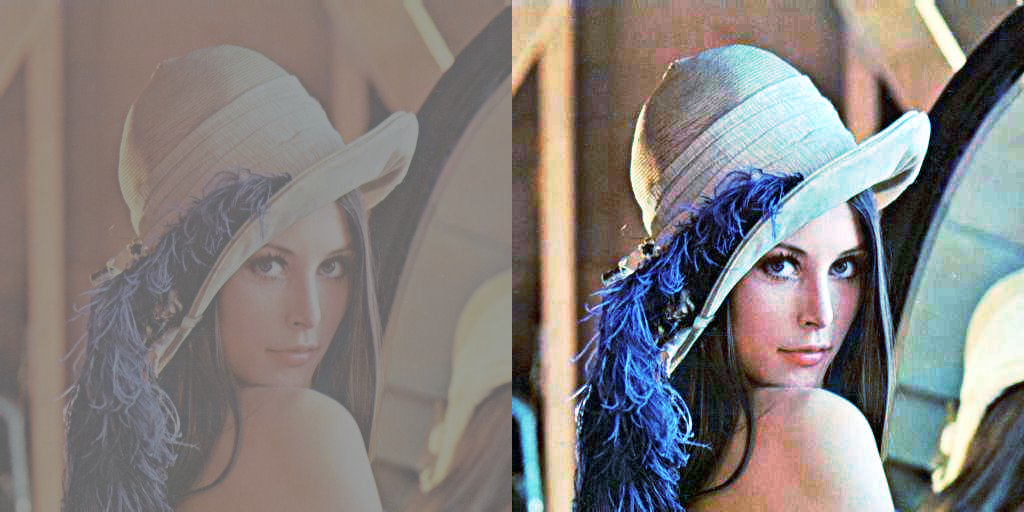

In [37]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

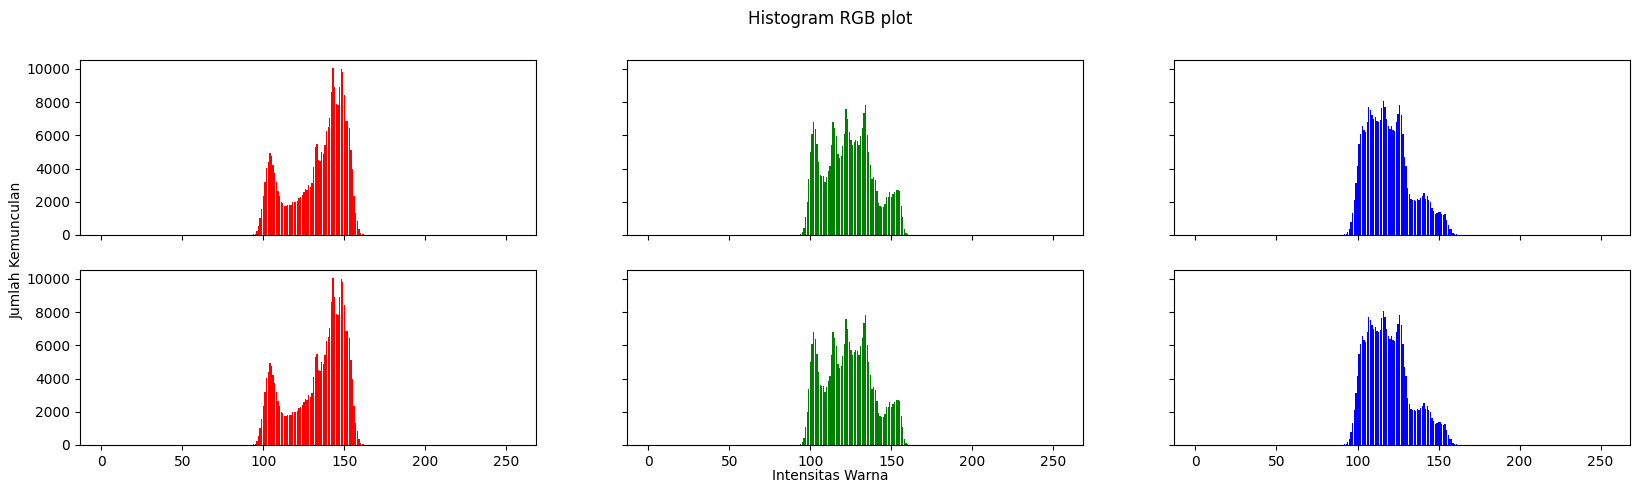

In [38]:
names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

In [39]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)


In [40]:
for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/lena.jpeg', img_8)

True

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

In [63]:
pip install pillow

In [64]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [65]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpeg')

# Konversi ke tipe float
img_float = np.float64(img_1)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

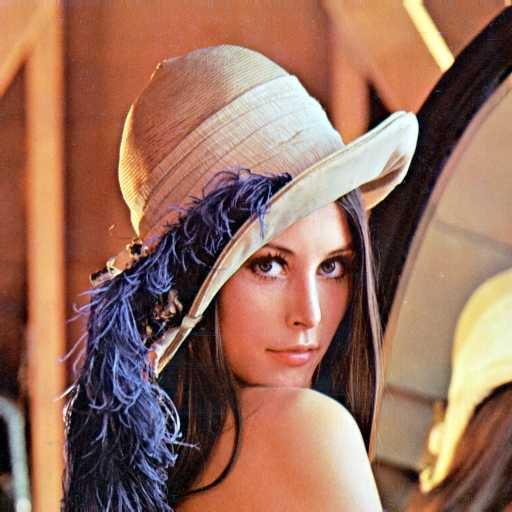

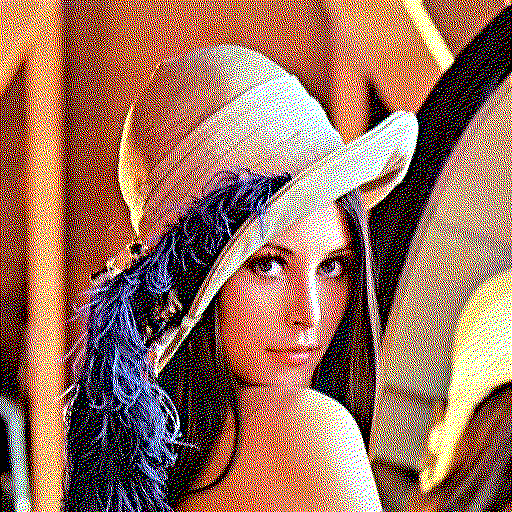

In [66]:
# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img_1)
cv2_imshow(output_img)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


In [45]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [46]:
# Baca citra asli
image = cv2.imread('/content/drive/MyDrive/PCVK/artispcvk.jpeg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 150
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 110
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

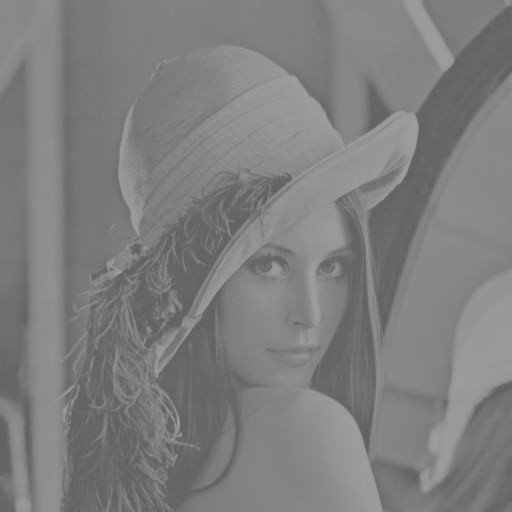

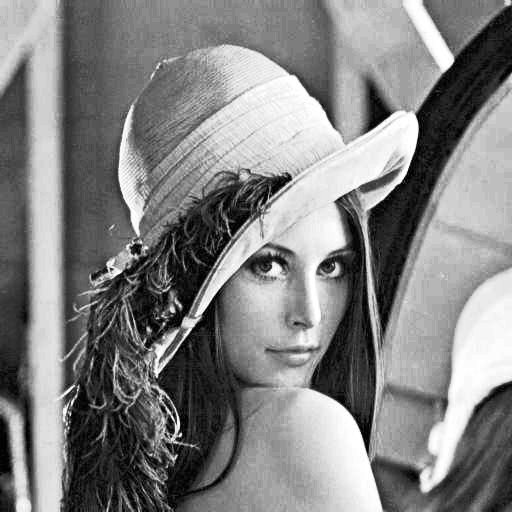

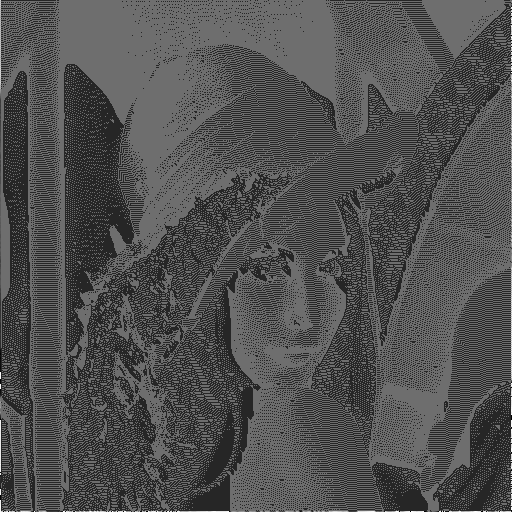

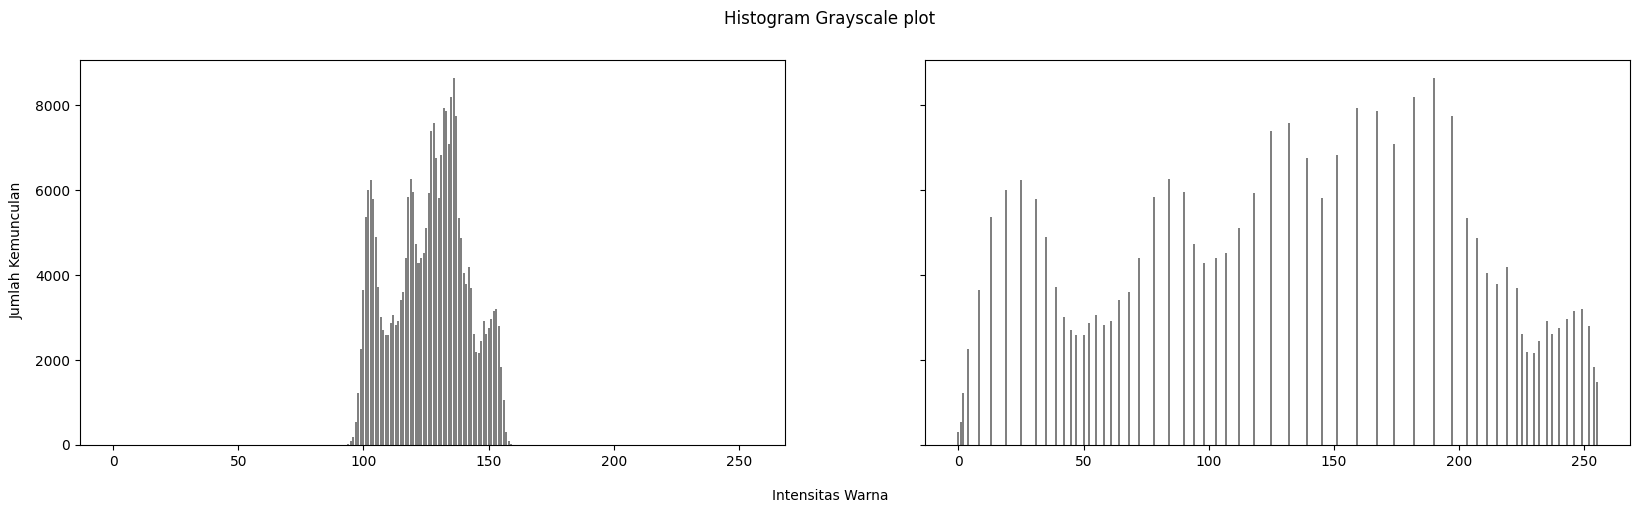

In [47]:
# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()

contoh 2

In [48]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [50]:
# Baca citra asli
image = cv2.imread('/content/drive/MyDrive/PCVK/artispcvk.jpeg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 240
for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 110
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 2 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

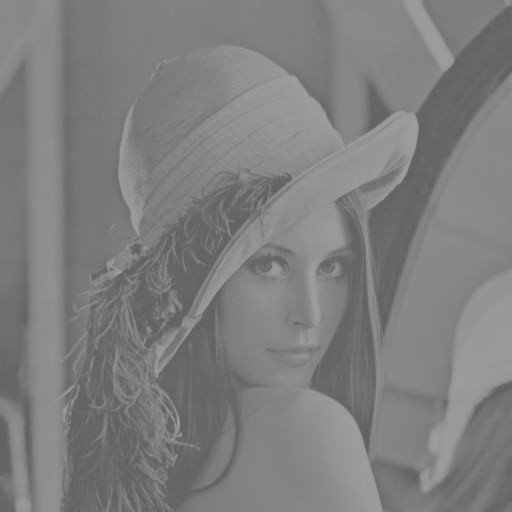

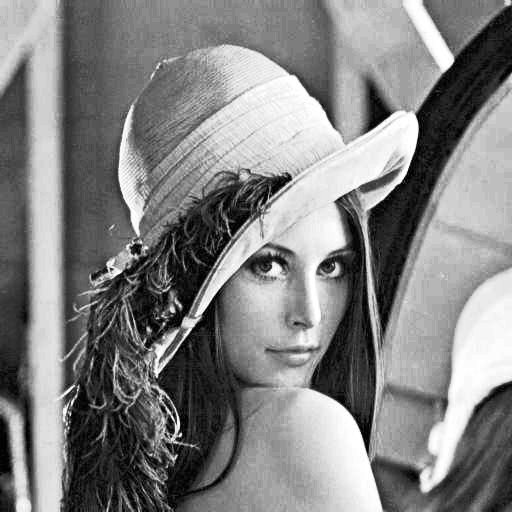

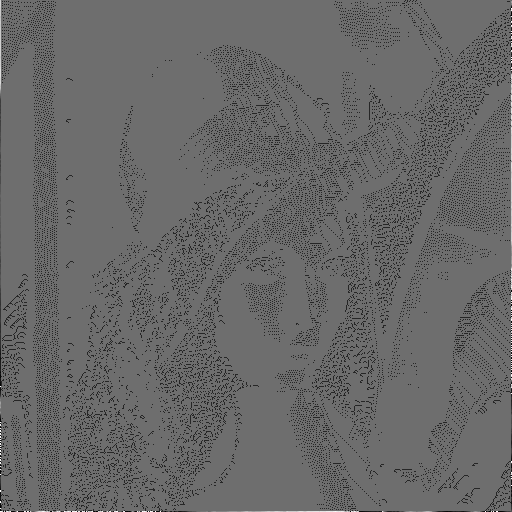

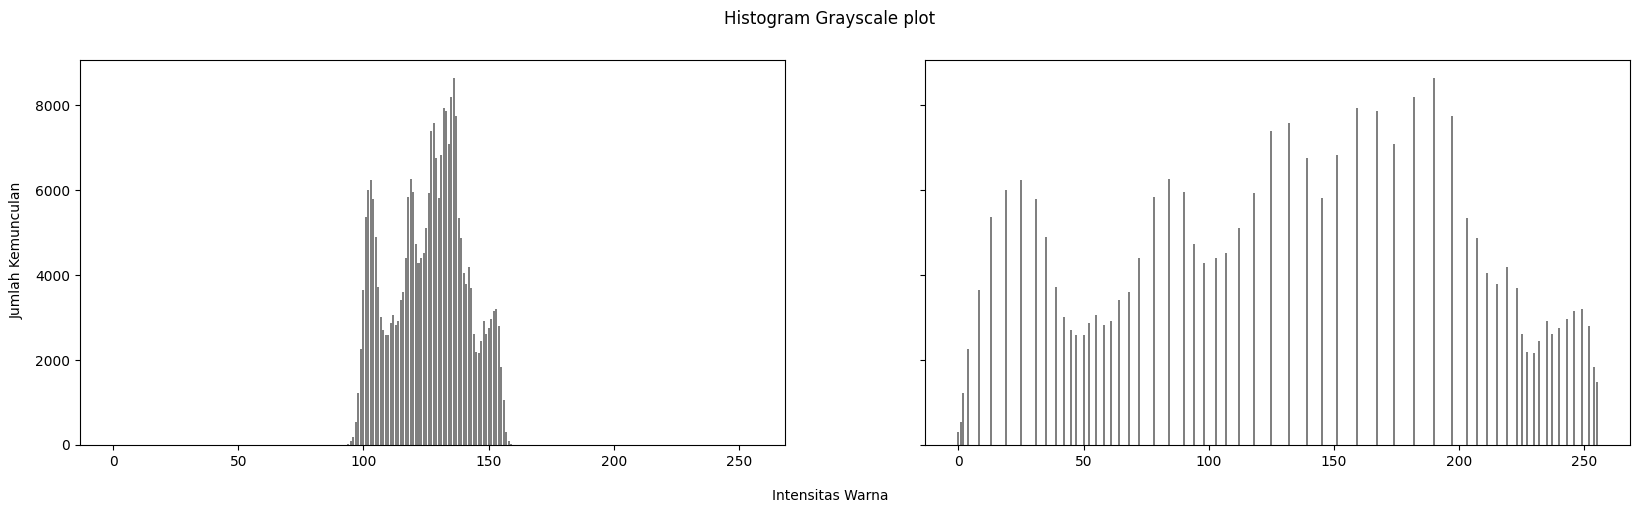

In [51]:
# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()